# Navie Bayes Classifier, Divar Dataset
## Goal :
in this project, our goal is to train a classifier algorythm using navie bayes classification in order to predict the category  of a new product based on its discretions and title words and similarly to classes and categories.

## Description :
in this project, first we want to normalize our datasets and store both our train and our test datasets in different data frames. after normalizing our data and simplifying our features we are about to implement the navie bayes probability for our train data set so that we can calculate the probability of a data being in a specified class and at last predicting the class of datas in test data frame. at the end and based on test data categories, we will determine the efficiency and accuracy of our classification predictor model.

### part 1 :

In [2]:
import pandas as pd
from __future__ import unicode_literals
from hazm import *
import advertools as adv #used for making a list of stop words in Persian.

In [3]:
stopwords = list(adv.stopwords['persian']) + ['.', '\n', '\r', '\t','?', '%', '!', ',','!!', '!!!!!', '!?', '：',',' ,'✔','ﻳﻜﺠﺎ', 'ﻳﻚ']
train_data = pd.read_csv("divar_train.csv")
test_data = pd.read_csv("divar_test.csv")

first, we read our dataframes(test&train) from .csv file and store them as pandas.DataFrame formats. after storing these datas in tp train_data and test_data,data frames we are about to normalaize our data frames.for doing so we are using some techniques and methods in hazm library and advertools.something that might decrease the accuracy of a classification algorythm in this type of problem, is stop words. we are going to talk about the stop words and their effect on the accurancy of the algorythm further. but for here regaurd that stopwords() function in adv library returns a list of stopwords in persian also we added some other characters to stop wordd list too.

In [4]:
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
print(stemmer.stem('کتاب\u200cها'))
print(stemmer.stem('می\u200cیافت'))
print(lemmatizer.lemmatize('می\u200cیافت'))

کتاب
می‌یاف
یافت#یاب


we want to consider a bag of words wich exists in the description and the title of each data as its features for classification, and we are going to classify them by these word and their probability of showing up in each class of categories and based on all of these probabilities and using navie bayes formula, we would predict the category of each data in test data frame and assessing the accurancy of these classification based on their real category in test data frame. for doing we would do some of the normalization methods and also we avoid using other. at following e will talk about wich methods we used in our normalizing process and wich we avoid to use and the reason for usage or not using them :

### avoided methods :

**1-Steming(required in part1) :** this method convert plural nouns into singular form. we avoide to use this method because 1- the lemmatizer function would also do the same as converting to singular form + converting verbs into past&oresent forms. 2- as you can see in the code above, sometimes this function would change the words in a wrong way and may cause problem.

**2-Tagger :** tagger would make a dictionary out of words and give each word a value, this value is considered as the tagg of a word. such as {adjective, noune, verb, ...}. we avoide to use this method because each word hase mostlt a constant tag and it would be the same if we just compare the words only. so for saving time we avoide to use this method.

**3-Chuncker :** chunker returns the role of each word or phrase in a sentence. because we split all sentenses into words this method would not be usefull and also it might take a lot of time to prossess and calculating probability.

**4-Dependency Parser :** this function make a tree out of all words in a sentence and would retern the dependendy graph of them. it could be understood better by seeing the figure below.

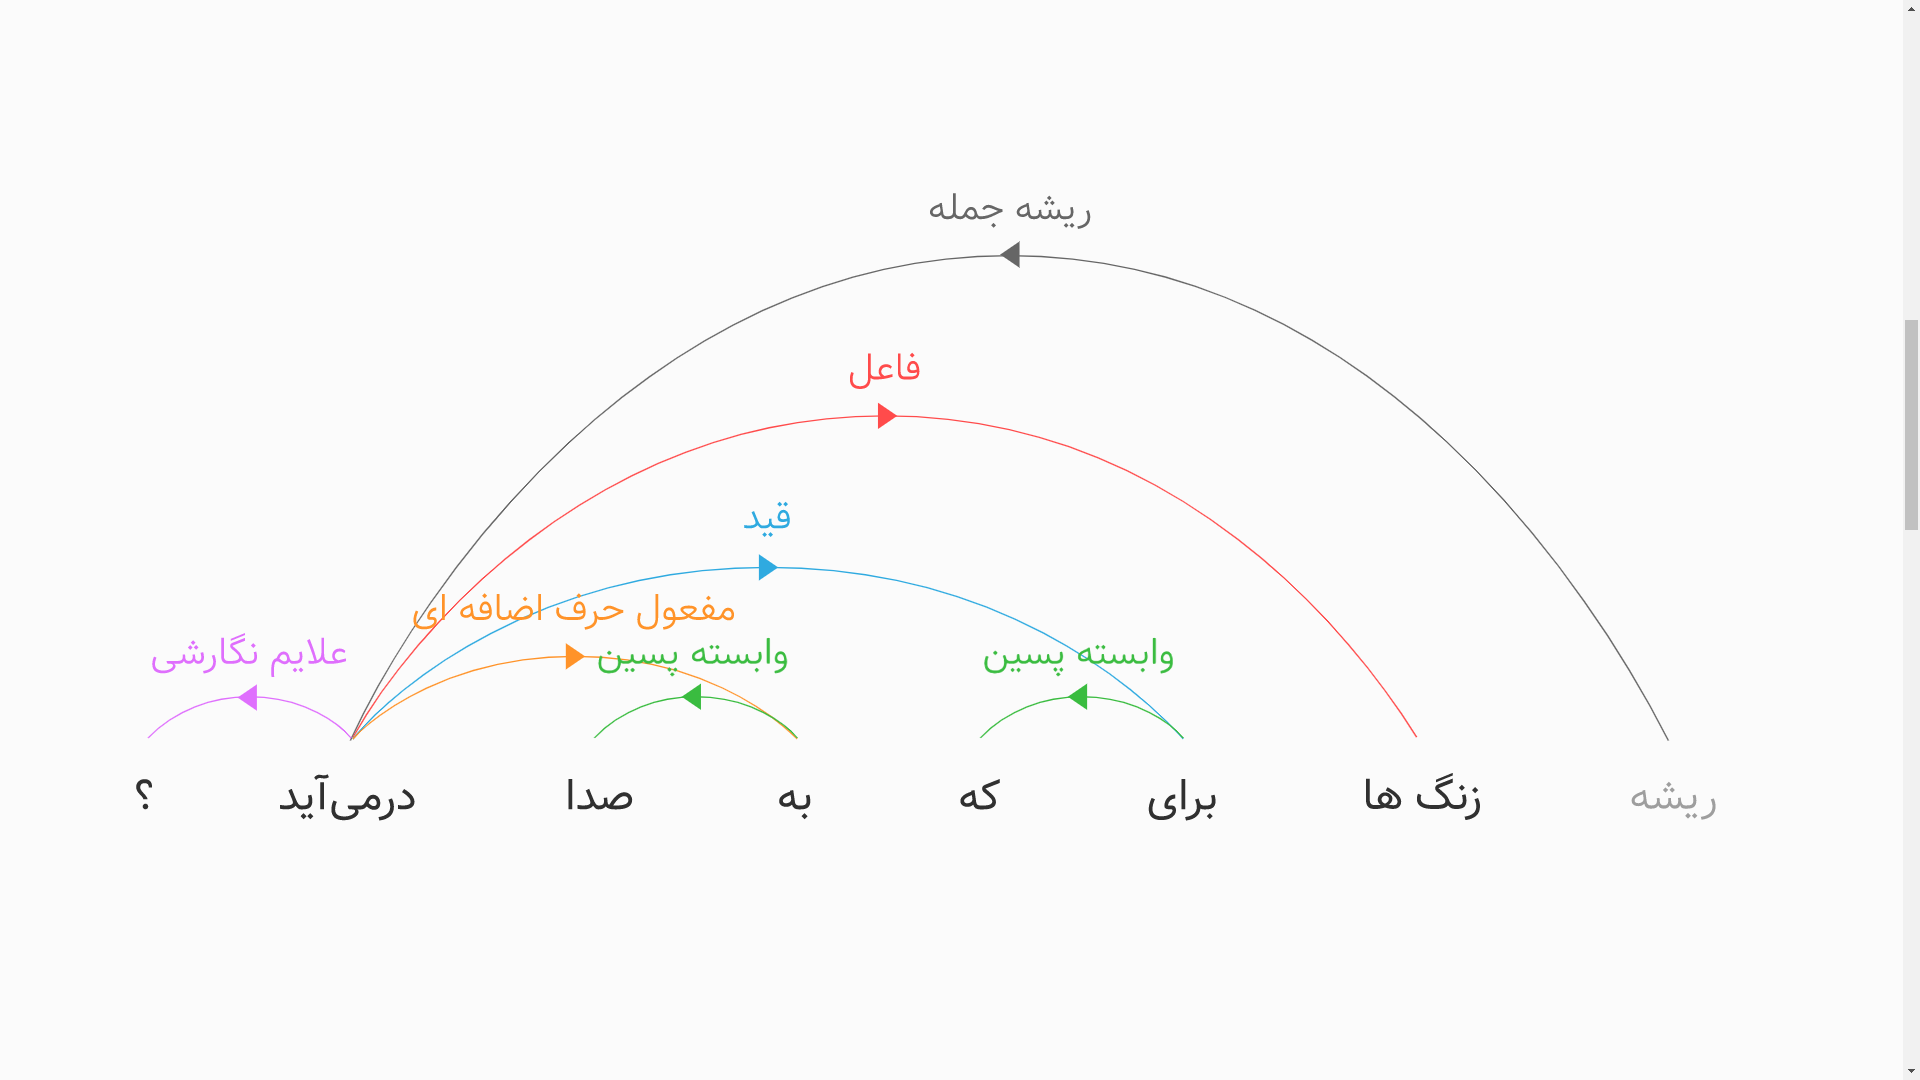

this might help the algorithm better because sometimes some words have different meanings based on the consept of the sentence and this method may help us to avoid consuming these words the same. but also, this method would take a lot of time and memory. so for simplifying our problem we dont use this method in our vlassification algorythm.

In [5]:
categories = {"leisure-hobbies":[],"for-the-home":[],"vehicles":[],"electronic-devices":[],"personal":[],"businesses":[]}

In [6]:
def preprocess(text, category = None):
    normalized = normalizer.normalize(text)
    words = word_tokenize(normalized)
    preprocessed =[]
    for word in words: 
        if word not in stopwords:
            new_word = lemmatizer.lemmatize(word)
            preprocessed.append(new_word)
            if category != None:
                categories[category].append(word)
    return preprocessed

### used methods :

**1-Normalizer :** the first method we used,is normalaizer. this function removes all halph-space, and also it would normalize the spacing in the way hat between every two character should exists an space character. this would help the tokenizer algorithm to tokenize words easier.

**2-Tokenizer :** this method would tokenize sentences into words and this would simplify the classification because if se dont tokenize them, calculating the bayes probability would be hard and also there are very rarely probability that a sentence would be repeated in our data frame for the second time. so tokenizing would make sentenses more likely toeach other.

**3-Removing stopwords :** stop words are those word wich would be repeated frequently in sentences a lot and they mostly dont have any special meaning and they are mostly used for completing sentences. such as : {با، که، مانند، و، است، و ...} and also useless characters such as : {.,?,!,\t,\r,\n,...} these words are mostly shown in every sentence and this would cause the accurancy to decrease because we can not recognize the category of a specified data, based on these words most shown in classes. so we removed them.

**4-Lemmatizer (required in part1) :** this method would replace the plural word into singular words and also it would replace the verbs with their stem in past&present form. in this case words that are plural version of others or in a different form of verb, would consider the same at it would make our algorithm more efficient.

after all these we would return the list of these words. now aor preprocessing is complete.

### part 2 :

### count of words:

in the preprocessing function we would also append all words depend on the category of the word in to a dictionary of the name of that category. this is done, so that we can calculate the number of the reapets of a specified word in a class. by knowinh the count of repeat of each word in all categories we can know calculate the prior probability (p(x|c)). 

### Definition of Evidence, Prior, Postrior,Likelihood :

**Evidence :** evidence is the words that exists in the bag of word of each data in our data set. wich probability of evidence (p(X)) is fist the times of p(xi) in wich xi is a word in W(bag of words). then each P(xi) equals to count of xi in all number of existing word. this probability doesn't need to be calculated directly and can be calculated by navie bayes formula.

**Prior :** prior is p(c) wich means the probability of a class. it means how many datas in our data fram from all, are in this class. but because number of datas in each category is all the same the p(c) for all 6 classes are equal and they are equal to 1/6.

**Postrior :** postrior is the probability of p(c|X) wich means the probability of the bags of word X, be in class c. wich what we need to calculate for each class and our prediction category would be the wich the postrior of this words of bags being in that category is the biggest probability.

**Likelihood :** likelihood is the p(X|c) wich X is the bag of words. and because we consider words independent from each other, it would be simplified to times of p(xi|c) such that p(X|c) = p(x1|c)p(x2|c)...p(xn|c). also each p(xi|c) means the probability of xi in wich xi is in class c. for calculating so we can easily devide the number of repeats of xi in class c to number of all repeats of word xi.

In [7]:
prior = 1/len(categories) #prior probability wich is calculated by n(ci)/n(total words)and 
            #because we have 6 class with equal count of words we remain 1/6.
print('Train:')
train = pd.DataFrame(columns=['bags of words', 'categories'])
for i in range(len(train_data)):
    if i%1000 == 0:
        print(i,"data preprocessed.")
    category = train_data['categories'][i]
    train = train.append({'bags of words' : preprocess(train_data['title'][i],category) + 
            preprocess(train_data['description'][i],category),'categories': category}, ignore_index=True)
    
print('Test:')    
test = pd.DataFrame(columns=['bags of words', 'categories'])
for i in range(len(test_data)):
    if i%200 == 0:
        print(i,"data preprocessed.")
    test = test.append({'bags of words': preprocess(test_data['title'][i])+ preprocess(test_data['description'][i])},
                       ignore_index=True)

Train:
0 data preprocessed.
1000 data preprocessed.
2000 data preprocessed.
3000 data preprocessed.
4000 data preprocessed.
5000 data preprocessed.
6000 data preprocessed.
7000 data preprocessed.
8000 data preprocessed.
9000 data preprocessed.
10000 data preprocessed.
Test:
0 data preprocessed.
200 data preprocessed.
400 data preprocessed.
600 data preprocessed.
800 data preprocessed.
1000 data preprocessed.
1200 data preprocessed.
1400 data preprocessed.
1600 data preprocessed.


next, we would merge the description and the title featurs. so that we abstract a list of words and we use this single list as the feature to assessing our datas. we preprossess the words in these two columns and put all these words in a single list. at the end we have our simplified dataframes known as "train" and "test". in preprocessing all word in title and normalize, tokenize. lemmatize and also remove stop words from each bag of words. and return the normalized words in a list.
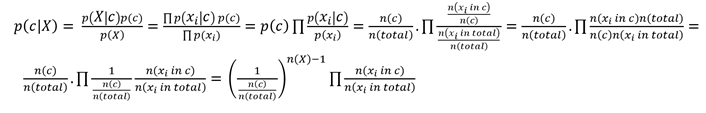

In [8]:
def calculate_likelihood(word, category): #n(xi in c)/n(xi in total)
    total = 0
    for c in categories:
         total += categories[c].count(word)
    if total == 0:
        return prior
    return (categories[category].count(word))/(total)


def bayes(words, category):
    probability = prior;
    for word in words:
        probability = (probability*calculate_likelihood(word,category))/prior
    return probability

calculate likelihood function would calculate the probability of P(x|c) which is the prior probability. For this reason we use the calculate_likelihood function. This function gets 2 inputs: word, category.

**word:** is the specific feature that we are trying to find in which category repeats more frequently.

**category:** is the class that we want to calculate the probability belong of the **word** to this class.

first we calculate the number of word in all 6 categories. And then we calculate the number of the **word** in **category** by dividing the second argument to total number of word we will achieve the probability of P(x|c).

**note:** If the word doesn't exist in any of the categories, we will return 1 as our result.

### part 3 :

exmple 1 : شیر خشک & شیر آّب

example 2:  برگ کاغذ & برگ درخت

In first example the word **SHIR** has two meaning. In the first sentence means DRIED MILK and in the second one means FAUCET.
Because of the similar shape of two word we need the other word to recognize the complete meaning of the word **SHIR**.
In the second example first **BARG** means LEAF and the second one means PAPER. In this example we need other words in the sentences.

As we can see in both examples we need the combination of two or more words to recognize the right meaning.
In these examples using the combination of two words is enough to recognition.

“SHIR KHOSK” and “SHIR AAB”

“BARG DERAKHT” and “BARG KAGAZ”

in these exampeles ther was no need to check n-gram models but sometimes even 2-gram doesn't work and we need to implement n-gram model.

### part 4:

p(x|ci) = num(word) in ci)/total -> if x only exists in one of these ci's, the p(x|ci) = 1 for that i and the rest would be zero and so the predictor would most secretly say this word is for this category but as we said, existing a word in a single category, doesnt mean it is for that category.

in this case if a word only exist a single category and doesn't exist in other categories, other probabilities wouldnt be zero anymore and so if a word only existed in a single category it wouldnt mean this word 100% belongs to this category.When only one sample exist in the train data according to the naïve Bayes the occurrence probability in the category will be 1 and in the others categories it will be 0. This condition may generate wrong answer.For avoiding this problem we reduce the probability of category by a factor ALPHA and increase the others category by ALPHA factor instead of 0.Finding the value of ALPHA is a major problem. And finding best ALPHA factor needs try and error attempt.Depending on the prior knowledge,Generally, there is also a possibility that no value may be computable or observable in a finite time. But at least one possibility must have a non-zero pseudocount, otherwise no prediction could be computed before the first observation. The relative values of pseudocounts represent the relative prior expected probabilities of their possibilities. The sum of the pseudocounts, which may be very large, represents the estimated weight of the prior knowledge compared with all the actual observations (one for each) when determining the expected probability.

### part 5:
additive smoothing, is a technique used to smooth categorical data. Given a set of observation counts X=<x1,x2,...,xd> from d-dimensional multinomial distribution with N trials, a "smoothed" version of the counts gives the estimator:

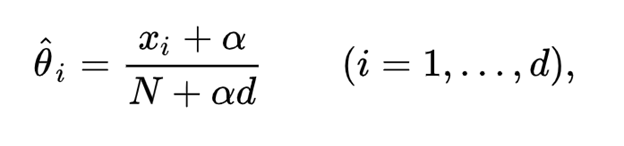

From a Bayesian point of view, this corresponds to the expected value of the posterior distribution, using a symmetric Dirichlet distribution with parameter α as a prior distribution. In the special case where the number of categories is 2, this is equivalent to using a Beta distribution as the conjugate prior for the parameters of Binomial distribution.
In any observed data set or sample there is the possibility, especially with low-probability events and with small data sets, of a possible event not occurring. Its observed frequency is therefore zero, apparently implying a probability of zero. This oversimplification is inaccurate and often unhelpful, particularly in probability-based machine learning techniques such as artificial neural networks and hidden Markov models. By artificially adjusting the probability of rare (but not impossible) events so those probabilities are not exactly zero, zero-frequency problems are avoided. Also see Cromwell's rule.

In [9]:
def additive_smoothing_likelihood(word, category, alpha):
    total = alpha/prior
    for c in categories:
         total += categories[c].count(word)
    return (categories[category].count(word)+ alpha)/(total)



def additive_smoothing_bayes(words, category,alpha):
    probability = prior;
    for word in words:
        probability = probability*additive_smoothing_likelihood(word,category,alpha)/prior
    return probability 

### part 6:

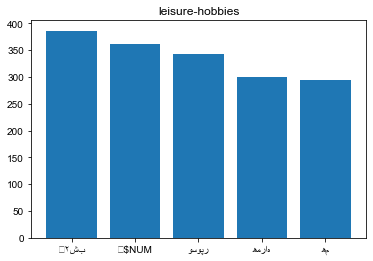

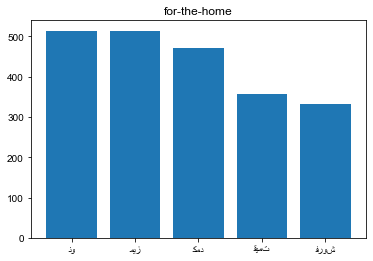

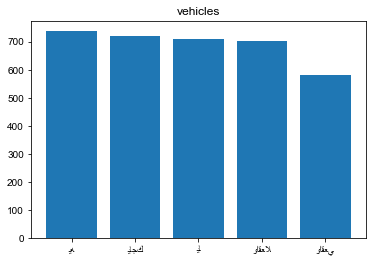

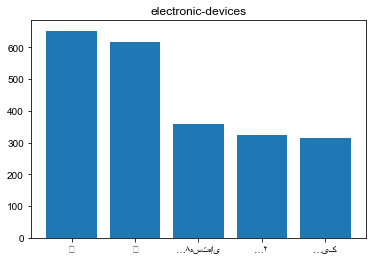

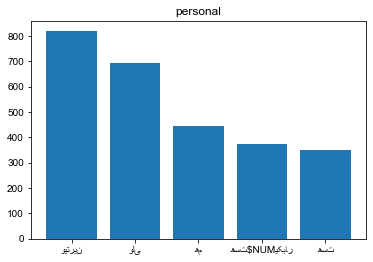

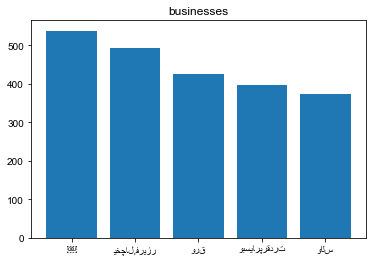

In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from arabic_reshaper import reshape

headers = ["leisure-hobbies","for-the-home","vehicles","electronic-devices","personal","businesses"]

resultList = []

def findMostCommonValues(categories):
    for c in categories:
        resultList.append(np.unique(categories[c], return_counts= True))
        
    return resultList
 

matplotlib.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})

resultList = findMostCommonValues(categories)

for i in range(len(headers)):
    plt.figure(i + 1)
    plt.bar(sorted(resultList[i][0], reverse=True)[:5], sorted(resultList[i][1], reverse=True)[:5])
    plt.title(headers[i])
    

as you can wee we sorted all categories words and some word seem to be repeated in some of them as most repeated ones such as "نو" but overall we can use these most repeated words and use them to simplify and assesst the probability of being in a class and our prediction to make our algorythm faster and also more efficient. also we can see again some words even tho we removed them in stopwords aren't removed because of they are a converted version of words such as "یه" instead of "یک". also shapes and emojies are frequently repeated but we can not consider all characters and we only removed persian ones.

### part 7:

using recall or precision individually doesnt always assesst our classification algorythm in a right wa, because one of them calculate the number of correct predictions in a specific class that we have predicted(precsiotion) and the other one talks about the number of correct detection in that specific class over all number of the data in that class. but we know both the predictions related to this class that were wrong and also the datas that they belonged to this class but we didn't recognize them in this class are important and they both together shows the efficiency of our model. Using accuracy as a defining metric for our model does make sense intuitively, but more often than not, it is always advisable to use Precision and Recall too. There might be other situations where our accuracy is very high, but our precision or recall is low. Ideally, for our model, we would like to completely avoid any situations where the patient has heart disease, but our model classifies as him not having it i.e., aim for high recall.

**considering Precision only :**  precision shows how much of our predictions to class Ci, was actually in Ci. imagine we have 1000 data that belongs to class Ci, and we predicted one them in class Ci and thats all. our prediction is 1/1 * 100 =100%. aldo all our predictions related to class Ci were correct(that 1 data) but we have 999 other data in this class that we didn't predict them in class Ci. so if we only consider precision wich as we calculated 100% we would think our algorithm has high accuracy but as we said its not.

**considering Recall only :**  recall shows how many data that we have detected that blong to class Ci correctly over all number of this class members. imagine we have 100 data that belongs to class Ci and we have predicted 1000 data in class Ci including all data that really exists in Ci. our prediction is 100/100 * 100 =100%. but we have predicted 900 other data that didnt blong to class Ci in this class wich is pretty bad.so if we only consider recall wich as we calculated 100% we would think our algorithm has high accuracy but as we said its not.

### part 8:

F1-score is the Harmonic mean(geometric mean) of the Precision and Recall. in cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score.This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well. we normally use the arithmetic mean wich is defined as (a+b)/2. the reason that harmonic mean is better than arithmatic mean is that in our algorythm both parameters are important and if one of these parameters are 0 for example it should cause the hole efficiency to zero and even if the other parameter was 100% accurate, still our algorythm doesn't work well. in the other word, We use the harmonic mean instead of a simple average because it punishes extreme values. A classifier with a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0. The F1 score gives equal weight to both measures and is a specific example of the general Fβ metric where β can be adjusted to give more weight to either recall or precision. (There are other metrics for combining precision and recall, such as the Geometric Mean of precision and recall, but the F1 score is the one we use most often.) If we want to create a classification model with the optimal balance of recall and precision, then we try to maximize the F1 score. 

### part 9:

so as we see in this project we have 6 class or category we need to find a way to implement our classifier,classification tasks in machine learning involving more than two classes are known by the name of "multi-class classification". Performance indicators are very useful when the aim is to evaluate and compare different classification models or machine learning techniques. Many metrics come in handy to test the ability of a multi-class classifier. Those metrics turn out to be useful at different stage of the development process, e.g. comparing the performance of two different models or analysing the behaviour of the same model by tuning different parameters. In this white paper we review a list of the most promising multi-class metrics, we highlight their advantages and disadvantages and show their possible usages during the development of a classification model. so in this case we present 3 parameters in weighted format to implement our classifier. in this case we have used 3 parametrs : **macro , micro, weighted**. wich they are defined as following:

**1-macro :** an arithmetic mean of the per-class F1-scores. This is called the macro-averaged F1-score, or the macro-F1 for short, and is computed as a simple arithmetic mean of our per-class F1-scores: 
#### *macro-F1 = sigma(F1 score)/n :over all classes, n:number of classes*
**2-micro :** To calculate the micro-F1, we first compute micro-averaged precision and micro-averaged recall over all the samples , and then combine the two.now for micro-average, We simply look at all the samples together. Remember that precision is the proportion of True Positives out of the Predicted Positives. In the multi-class case, we consider all the correctly predicted samples to be True Positives.Since precision=recall in the micro-averaging case, they are also equal to their harmonic mean. Moreover, this is also the classifier’s overall accuracy: the proportion of correctly classified samples out of all the samples. To summarize, the following always holds true for the micro-F1 case:
#### *micro-F1 = micro-precision = micro-recall = accuracy*
**3-weighted :** in weighted-average F1-score, or weighted-F1, we weight the F1-score of each class by the number of samples from that class. The weighted-F1 score is thus computed as follows: 
#### *macro-F1 = sigma(wi * F1 score)/sigma(wi) :over all classes, wi:weight of classes wich is the actual number f the class*

### Prediction :

In [ ]:
import operator

AddSmooth_Prediction = []
NonAddSmooth_Prediction = []
alpha = 50
i = 0

real_categories = list(test_data['categories'])
for data in test['bags of words']:
    i += 1
    if i%100 == 0:
        print(i, "data predicted!")
    pc1 ={"leisure-hobbies":None,"for-the-home":None,"vehicles":None,"electronic-devices":None,"personal":None,"businesses":None}
    pc2 ={"leisure-hobbies":None,"for-the-home":None,"vehicles":None,"electronic-devices":None,"personal":None,"businesses":None}
    for category in categories:
        pc1[category] = additive_smoothing_bayes(data, category,alpha)
        pc2[category] = bayes(data, category)
    AddSmooth_Prediction.append(max(pc1.items(), key=operator.itemgetter(1))[0])
    NonAddSmooth_Prediction.append(max(pc2.items(), key=operator.itemgetter(1))[0])


100 data predicted!
200 data predicted!
300 data predicted!


In [ ]:
def correct(predicted, real, category):
    if len(real) != len(predicted):
        raise ValueError("Lists of different length.")
    return sum(j==category and i==category for i, j in zip(predicted, real))

def efficiency(category, predicted, real):
    
    all_detect_class = predicted.count(category)
    total_class = real.count(category)
    correct_detect = correct(predicted, real,category)
        
    precision = correct_detect/all_detect_class
    recall = correct_detect/total_class
    F_score = (2*precision*recall)/(precision+recall)
    
    return [precision,recall,F_score]
    
def Accuracy(predicted, real): #dont need to write a function for micro, micro=accuracy
    correct_detect = 0
    for c in categories:
        correct_detect += correct(predicted, real,c)
    return correct_detect/len(real)

def Weighed(predicted, real, weighted = True): #dont need to write a function for macro, macro is a weighted avg, with equal weights
    summ = 0
    i = 0
    weights = [1,1,1,1,1,1]
    if weighted:
        for c in categories:
            weights[i] = real.count(c)
            i += 1   
    i = 0
    for c in categories:
        [precision,recall,F_score] = efficiency(c, predicted, real)
        summ += weights[i]*F_score
        i += 1
    
    return summ/sum(weights)

### part 10:

In [56]:
#Addetive smoothing
for c in categories:
    print(c)
    [precision,recall,F_score] = efficiency(c, AddSmooth_Prediction, real_categories)
    print("precision : ", precision*100,"%")
    print("recall : ", recall*100,"%")
    print("F_score : ", F_score*100,"%")
    print()

leisure-hobbies
precision :  88.25757575757575 %
recall :  77.66666666666666 %
F_score :  82.6241134751773 %

for-the-home
precision :  86.46288209606988 %
recall :  66.0 %
F_score :  74.85822306238184 %

vehicles
precision :  80.78078078078079 %
recall :  89.66666666666666 %
F_score :  84.99210110584518 %

electronic-devices
precision :  82.30088495575221 %
recall :  93.0 %
F_score :  87.32394366197184 %

personal
precision :  81.43322475570032 %
recall :  83.33333333333334 %
F_score :  82.37232289950576 %

businesses
precision :  71.03658536585365 %
recall :  77.66666666666666 %
F_score :  74.20382165605095 %



In [65]:
#Not Addetive smoothing
for c in categories:
    print(c)
    [precision,recall,F_score] = efficiency(c, NonAddSmooth_Prediction, real_categories)
    print("precision : ", precision*100,"%")
    print("recall : ", recall*100,"%")
    print("F_score : ", F_score*100,"%")
    print()

leisure-hobbies
precision :  32.093023255813954 %
recall :  92.0 %
F_score :  47.58620689655172 %

for-the-home
precision :  85.48387096774194 %
recall :  53.0 %
F_score :  65.43209876543212 %

vehicles
precision :  90.47619047619048 %
recall :  56.99999999999999 %
F_score :  69.93865030674846 %

electronic-devices
precision :  83.56164383561644 %
recall :  40.666666666666664 %
F_score :  54.70852017937219 %

personal
precision :  87.95811518324608 %
recall :  56.00000000000001 %
F_score :  68.4317718940937 %

businesses
precision :  72.36842105263158 %
recall :  55.00000000000001 %
F_score :  62.500000000000014 %



In [69]:
#Addetive smoothing
accuracy  = Accuracy(AddSmooth_Prediction, real_categories) #micro = accurancy
macro =  Weighed(AddSmooth_Prediction, real_categories, weighted = False)
weighted = Weighed(AddSmooth_Prediction, real_categories)
print("accuracy : ", accuracy*100,"%")
print("micro : ", accuracy*100,"%")
print("macro : ", macro*100,"%")
print("weighted : ", weighted*100,"%")

accuracy :  81.22222222222221 %
micro :  81.22222222222221 %
macro :  81.06242097682215 %
weighted :  81.06242097682215 %


In [71]:
#None Addetive smoothing
accuracy  = Accuracy(NonAddSmooth_Prediction, real_categories) #micro = accurancy
macro =  Weighed(NonAddSmooth_Prediction, real_categories, weighted = False)
weighted = Weighed(NonAddSmooth_Prediction, real_categories)
print("accuracy : ", accuracy*100,"%")
print("micro : ", accuracy*100,"%")
print("macro : ", macro*100,"%")
print("weighted : ", weighted*100,"%")

accuracy :  58.94444444444444 %
micro :  58.94444444444444 %
macro :  61.4328746736997 %
weighted :  61.432874673699715 %


### part 11 :

as we can see the F-value in none using additive smoothing is very low and it means the accurancy in them is very low. as we can see in macro and accurancy in this method, we have predicted about 60% of data in test data frame correct. but in the mean while the F-value in class electronic devices has been changed a lot and has a large difference with additive smoothing method. and actualy in additive way, the F-value of this category has the most efficiency. the reason for this ia that before doing additive smoothing, our algorithm would put those data that has a word that doesnt exist in any other catrgory in that category without considerin other words and their probabilities. as we can see, accurancy in additive mode is such more better anh more efficient. the F-value is between 80-90 wich is a so much better than the none usage of additive algorithm.

### part 12:



in above we have consumes 5 data in our test data frame wich has been predicted wrong. the reason for this is that some word like "نو" are repeated so much in mostly all of our data sets and this would make our prediction to be based on these words wich we know these words doesnt have anything to do with the category meanings. the second thing is that altho we used additive smoothing algorithm but still those word wich they exist in specific category, still has a high probability and would be placed on this category mostly. also some characters as we said aren't in our stop words such as '★', or circles but we are not able to remove these charachters because we dont know their askii code to remove them from our data set.at last the are always some new words discovering in our test data that we havent consider them in our train data wich would change the probabilities.also ther are some converting mode of words in persian such as "یه" instead of "یک" and etc.

## Result :

one way to predict a class of a data fram is navie bayes algorithm. this algorithm is based on a simple method that checks the similarly of a new data, to other data in each class and would predict the category of that data, based on wich class is the closest to our data features. we used some methods to make our algorithm better and more efficient such as removing some of the most repeated words, removing stop word and  ..., but at the end and based on our predicton and accurancy parameters we can see this method is not that efficient.

## References 

1- https://github.com/ssghule/Naive-Bayes-and-Bag-of-Words-for-Text-Classification-Problem/blob/master/geolocate.py

2-https://www.geeksforgeeks.org/ml-naive-bayes-scratch-implementation-using-python/?ref=lbp

3-https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

4-https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

5-https://www.wikiwand.com/en/Additive_smoothing

6-https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

7-https://www.arxiv-vanity.com/papers/2008.05756/

8-https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

9-https://stackoverflow.com/questions/14914615/in-python-find-out-number-of-differences-between-two-ordered-lists